# Jamaican House Price Prediction Model: 

## My goal is to accurately predict house prices based on no. bedrooms, no. bathrooms, location and size.

In [159]:
!pip install -U pandas-profiling[notebook]

^C


In [160]:
!jupyter nbextension enable --py widgetsnbextension

^C


In [161]:
#import libraries
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import seaborn as sb
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go

#### Load data:

In [162]:
#read csv file
df = pd.read_csv('alllistings - fixed (3).csv')
df

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


,Address,List/Rent Price,Region,BR,BTH
0,7.5 LOMBARD CLOSE,527587.0,6,3.0,2.0
1,LOT #17 MAVERLEY MOUNTAI...,6000000.0,100,NaN,NaN
2,LOT #18 MAVERLEY MOUNTAI...,6500000.0,100,NaN,NaN
3,LOT #12 MAVERLEY MOUNTAI...,7500000.0,100,NaN,NaN
4,Lot 92 COOPERS HILL DRIVE,7500000.0,100,NaN,NaN
...,...,...,...,...,...
2128,14 CYPRESS HALL ROAD,24000000.0,21,4.0,3.0
2129,"31PARL ROAD, BELLA VISTA",24000000.0,19,4.0,3.0
2130,FAIRLANE DRIVE,24000000.0,10,4.0,2.0
2131,30 BEACH CLOSE,24000000.0,17,5.0,6.0


#### Clean data:

In [163]:
#dropping listings without number of bedrooms or bathrooms
df = df.dropna(how='any')
df

,Address,List/Rent Price,Region,BR,BTH
0,7.5 LOMBARD CLOSE,527587.0,6,3.0,2.0
8,221 RUBY WAY,8500000.0,13,1.0,2.0
10,GOLDEN SPRING/MT FRIEND,9000000.0,9,5.0,2.0
18,10-1A DUQUESNAY AVE,10500000.0,10,1.0,1.0
19,APT5-21 MERRICK HIGHWAY,10800000.0,19,1.0,1.0
...,...,...,...,...,...
2128,14 CYPRESS HALL ROAD,24000000.0,21,4.0,3.0
2129,"31PARL ROAD, BELLA VISTA",24000000.0,19,4.0,3.0
2130,FAIRLANE DRIVE,24000000.0,10,4.0,2.0
2131,30 BEACH CLOSE,24000000.0,17,5.0,6.0


In [164]:
profile = df.profile_report(
    title="Report without correlations",
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": True},
        "phi_k": {"calculate": True},
        "cramers": {"calculate": True},
    },
)

In [165]:
profile

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Clean data:

In [166]:
#rename columns
df = df.rename(columns = {'List/Rent Price': 'price'})

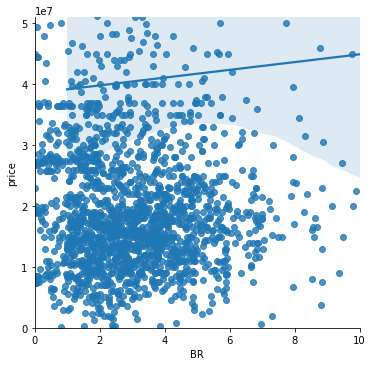

In [167]:
#plot graph for Price, BR and Bth
a_plot = sb.lmplot(x='BR',y='price',data=df, fit_reg=True, x_jitter= 1.0, y_jitter=0.1)
a_plot.set(xlim=(0, 10))
a_plot.set(ylim=(0, 51000000))

In [168]:
#changing Region's data type to a float for modelling
df['Region'] = df['Region'].astype('float')
df

,Address,price,Region,BR,BTH
0,7.5 LOMBARD CLOSE,527587.0,6.0,3.0,2.0
8,221 RUBY WAY,8500000.0,13.0,1.0,2.0
10,GOLDEN SPRING/MT FRIEND,9000000.0,9.0,5.0,2.0
18,10-1A DUQUESNAY AVE,10500000.0,10.0,1.0,1.0
19,APT5-21 MERRICK HIGHWAY,10800000.0,19.0,1.0,1.0
...,...,...,...,...,...
2128,14 CYPRESS HALL ROAD,24000000.0,21.0,4.0,3.0
2129,"31PARL ROAD, BELLA VISTA",24000000.0,19.0,4.0,3.0
2130,FAIRLANE DRIVE,24000000.0,10.0,4.0,2.0
2131,30 BEACH CLOSE,24000000.0,17.0,5.0,6.0


#### Visualize data:

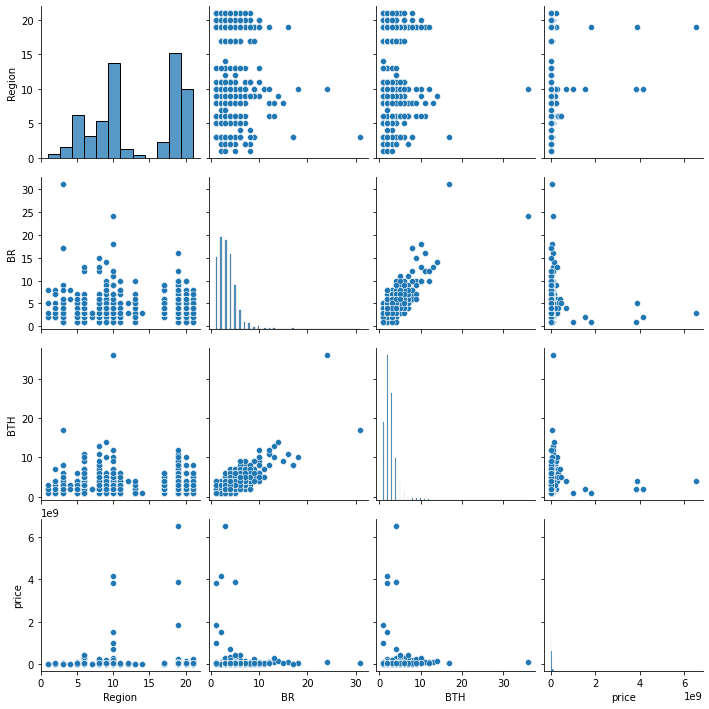

In [169]:
#plot data to visualize distribution
sb.pairplot(df[['Region', 'BR', 'BTH', 'price']]);

I can see a correlation between no. of beds and no. of baths but my dependent variable, price, doesn't show any initial correlation with the other features. 

## Define x and y:

In [170]:
factors = ['Region', 'BR', 'BTH']
x=df[factors].values
y=df['price'].values

In [171]:
print(x)
print(y)

[[ 6.  3.  2.]
 [13.  1.  2.]
 [ 9.  5.  2.]
 ...
 [10.  4.  2.]
 [17.  5.  6.]
 [17.  4.  4.]]
[  527587.  8500000.  9000000. ... 24000000. 24000000. 24000000.]


## Split data into train and test models 

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)

## Train model
### Decision Tree:

In [173]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_leaf_nodes=50)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=50)

## Predict test results

In [174]:
y_pred = model.predict(x_test)

In [175]:
model.predict([[6,3.0,2.0]])

array([527587.])

This gave an accurate price predictions but now we need to check the accuracy of the other predictions.

In [176]:
#create functiom to experiment with MAEs of different nodes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [177]:
#find number of nodes with smallest MAE
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  22013543
Max leaf nodes: 50  		 Mean Absolute Error:  21174767
Max leaf nodes: 500  		 Mean Absolute Error:  21380513
Max leaf nodes: 5000  		 Mean Absolute Error:  21380513


50 nodes produces the smallest MAE which means it is the most appropriate number for the max leaf nodes of our Decision Tree.

### Random Forest:

In [178]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(x_train, y_train)
preds = forest_model.predict(x_test)
mae = mean_absolute_error(y_test, preds)
get_mae(50, x_train, x_test, y_train, y_test)

21174767.158942625

All in all, I definitely need to add more variables to the data to increase the accuracy. I am not satisfied with the MAEs that are being produced. My ideal MAE is approximately $2,000,000.